In [14]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

data=pd.read_csv("project.csv" )
columns_to_keep = ['year','g']
df = data[columns_to_keep]
df['year'] = pd.to_datetime(df['year'])
df.set_index('year', inplace=True)
#df

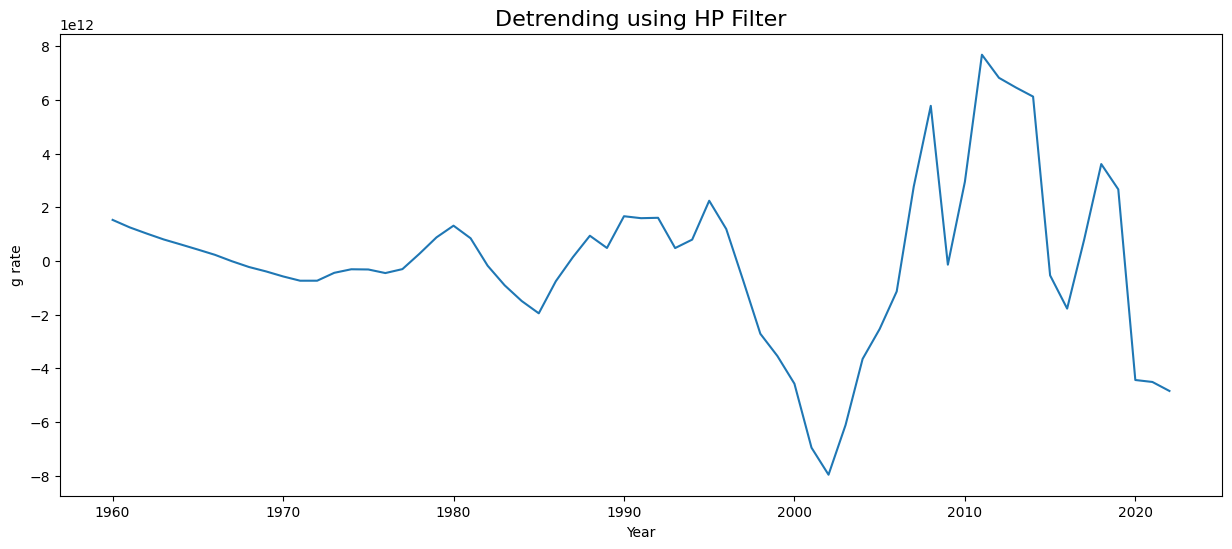

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

g_cycle,g_trend = hpfilter(df['g'], lamb=1600)
df['trend'] = g_trend
detrended = df.g - df['trend']
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('g rate')
plt.show()

In [16]:
import pandas as pd

# Convert Series to DataFrame
dataframe = detrended.to_frame()

# Print the resulting DataFrame
dataframe

,0
year,
1960-01-01,1.529544e+12
1961-01-01,1.250659e+12
1962-01-01,1.020101e+12
1963-01-01,8.001318e+11
1964-01-01,6.142266e+11
...,...
2018-01-01,3.610857e+12
2019-01-01,2.667428e+12
2020-01-01,-4.437884e+12


In [17]:
import pandas as pd

# Assuming 'dataframe' is your DataFrame
df_renamed = dataframe.rename(columns={0: 'g'})
df_renamed

,g
year,
1960-01-01,1.529544e+12
1961-01-01,1.250659e+12
1962-01-01,1.020101e+12
1963-01-01,8.001318e+11
1964-01-01,6.142266e+11
...,...
2018-01-01,3.610857e+12
2019-01-01,2.667428e+12
2020-01-01,-4.437884e+12


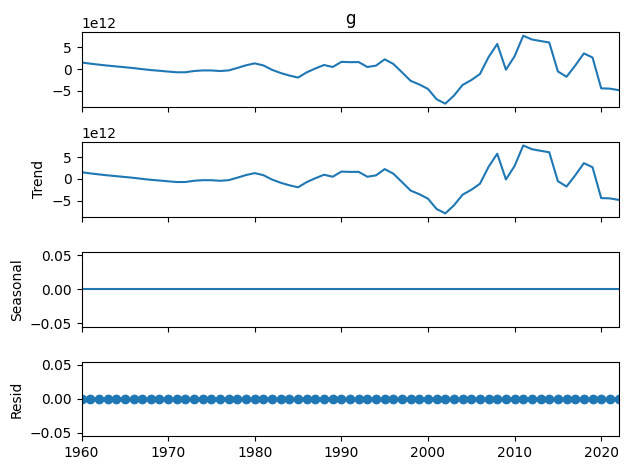

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
result = seasonal_decompose(df_renamed['g'], model='add')
#result = seasonal_decompose(df_renamed['g'], model='mul')
result.plot();

# **save to csv**

In [20]:


# Check for missing values in each column
missing_values = df_renamed.isnull().sum()

# Print the results
missing_values

g    0
dtype: int64

In [21]:
newdf3 = df_renamed



# Assuming you have a pandas DataFrame called 'df' with an index column called 'index_col'
newdf3['year'] = newdf3.index  # Create a new column with the index values
newdf3.reset_index(drop=True, inplace=True)  # Remove the index

# Assuming you have a pandas DataFrame called 'df'
last_column = newdf3.columns[-1]  # Get the name of the last column
newdf3 = newdf3[[last_column] + newdf3.columns[:-1].tolist()]

# The last column is now moved to the first position in the DataFrame
newdf3

,year,g
0,1960-01-01,1.529544e+12
1,1961-01-01,1.250659e+12
2,1962-01-01,1.020101e+12
3,1963-01-01,8.001318e+11
4,1964-01-01,6.142266e+11
...,...,...
58,2018-01-01,3.610857e+12
59,2019-01-01,2.667428e+12
60,2020-01-01,-4.437884e+12
61,2021-01-01,-4.510957e+12


In [22]:

# Assuming you have a pandas DataFrame called 'df'
newdf3.to_csv('g_hp(detrend).csv', index=None)
